# OCLI TRUE COLOR IMAGE
**NOTE:** data needs to be downloaded directoly from NASA's earthdata to this code.
* [Link to download data](https://search.earthdata.nasa.gov/search/granules?p=C2954424032-OB_DAAC&pg[0][v]=f&pg[0][gsk]=-start_date&sb[0]=-77.0625%2C35.74143%2C-66.02344%2C42.97682&qt=2024-07-02T00%3A00%3A00.000Z%2C2024-07-02T23%3A59%3A59.999Z&fi=OLCI&fl=2%2B-%2BGeophys.%2BVariables%252C%2BSensor%2BCoordinates!1%2B-%2BRadiance&gdf=NetCDF&tl=1738540001!3!!&lat=30.480468750000004&long=-100.125&zoom=3)
### History: <br>
> * *2/3/25: notebook initialized*
### Objectives:
* Create a true color image (using rho_s values) of July 2024 Coccolithophore Bloom off Long Island using S3A OLCI data
### How to find data: 
* navigate to NASA earthdata search
* click calendar icon --> input query date
* click cropping icon --> create polygon around study region
* dataset used: Sentinel-3A OLCI Inland Waters (ILW) Data, version 4

In [1]:
import xarray as xr
from xarray.backends.api import open_datatree
import numpy as np
import cartopy
import matplotlib.pyplot as plt

In [2]:
datatree = open_datatree(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI_EFRNT.20240702T145012.L2.ILW_CONUS.V4.nc')
ds1 =  open_datatree(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI_EFRNT.20240702T145312.L2.ILW_CONUS.V4.nc')
dataset = xr.merge(datatree.to_dict().values())
ds1 = xr.merge(ds1.to_dict().values())
#note: should merge xr datasets together, rather than keeping them separate 

C:\Users\haley.synan\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [5]:
#Define r,g,b variables
r= dataset.rhos_620
g=dataset.rhos_560
b=dataset.rhos_490

r1= ds1.rhos_620
g1=ds1.rhos_560
b1=ds1.rhos_490

#Normalize rho_s values
r = (r - r.min()) / (r.max() - r.min())
g= (g - g.min()) / (g.max() - g.min())
b = (b - b.min()) / (b.max() - b.min())

r1 = (r1 - r1.min()) / (r1.max() - r1.min())
g1= (g1 - g1.min()) / (g1.max() - g1.min())
b1 = (b1 - b1.min()) / (b1.max() - b1.min())

# Apply range limits for each channel. RGB values must be between 0 and 1
r = np.clip(r, 0, 1)
g = np.clip(g, 0, 1)
b = np.clip(b, 0, 1)
r1 = np.clip(r1, 0, 1)
g1 = np.clip(g1, 0, 1)
b1 = np.clip(b1, 0, 1)

# Apply a gamma correction to the image to correct ABI detector brightness
gamma = 1.5
r = np.power(r, 1/gamma)
g = np.power(g, 1/gamma)
b = np.power(b, 1/gamma)
r1 = np.power(r1, 1/gamma)
g1 = np.power(g1, 1/gamma)
b1 = np.power(b1, 1/gamma)


#stack rgb arrays
RGB = np.dstack([r,g,b])
rgb1=np.dstack([r1,g1,b1])


C:\Users\haley.synan\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
C:\Users\haley.synan\AppData\Local\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


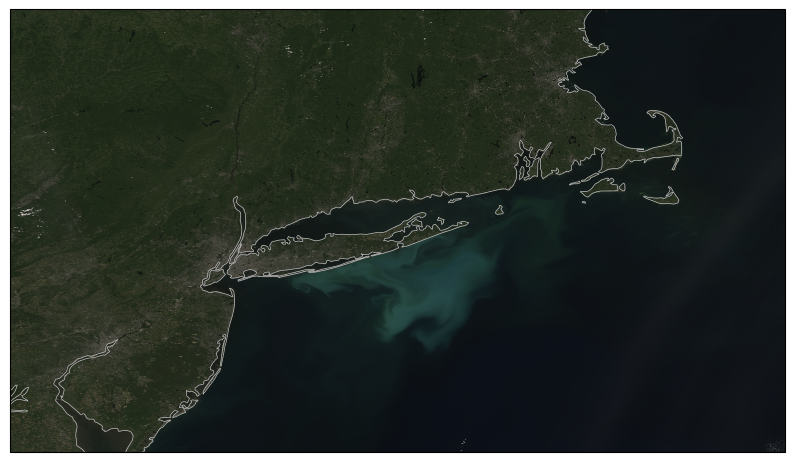

In [6]:
#visualize true color image
fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
plt.pcolormesh(dataset.longitude,dataset.latitude,RGB )
plt.pcolormesh(ds1.longitude,ds1.latitude,rgb1 )
ax.coastlines(color='silver',linewidth=0.5)
ax.set_extent([-76, -69, 39, 43])
